In [8]:
import pandas as pd
# Memuat dataset
df = pd.read_csv('Book1.csv')
# Menampilkan 5 baris pertama dataset
df.head()




,Index,Nama,Usia,Jenis Kelamin,Jurusan,Matematika,IPA,Bahasa Inggris
0,0,Alice,20,Perempuan,Informatika,85,90,78
1,1,Bob,21,Laki-laki,Informatika,82,88,74
2,2,Charlie,22,Laki-laki,Sistem Informasi,91,85,89
3,3,Daisy,20,Perempuan,Sistem Informasi,78,80,84
4,4,Eve,21,Perempuan,Informatika,90,92,88


In [27]:
from sklearn.model_selection import RepeatedKFold
# Mengatur Repeated K-Fold Cross-validation
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
# Melakukan cross-validation dan menghitung skor
repeated_scores = cross_val_score(model, X, y, cv=repeated_kfold)
print(f'Repeated K-Fold Cross-validation Mean Score: {repeated_scores.mean()}')

Repeated K-Fold Cross-validation Mean Score: 0.9640000000000001


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
# Define the model
model = SVC()
# Define the parameter grid
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [1, 0.1, 0.01, 0.001],
'kernel': ['rbf']
}
# Initialize Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# Fit Grid Search
grid_search.fit(X, y)
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.9800000000000001


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Tambahkan kolom 'species' berdasarkan target dari dataset
data['species'] = iris.target

# Map target integers to species names (0: setosa, 1: versicolor, 2: virginica)
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) 

# Tampilkan beberapa baris pertama dari data
print(data.head())

# Menampilkan statistik deskriptif
print(data.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

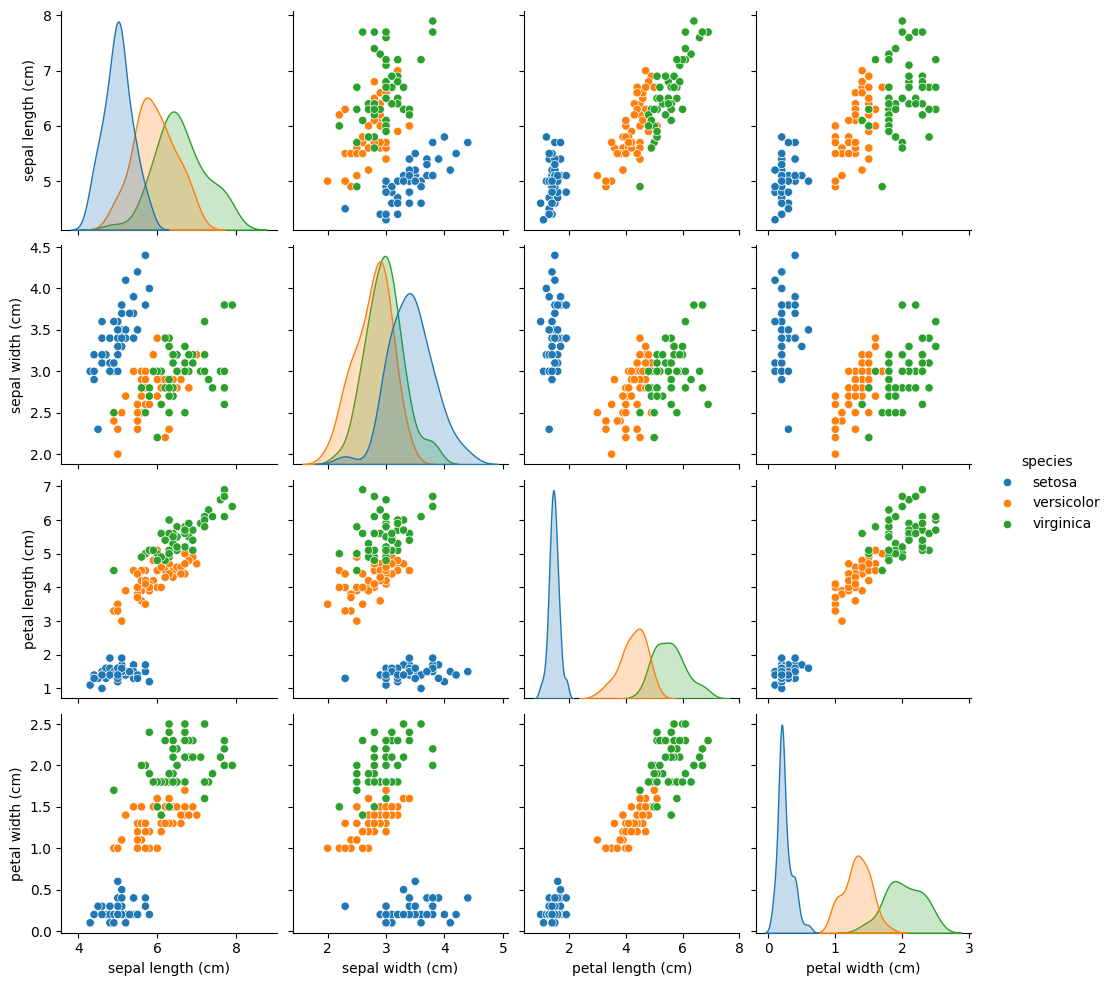

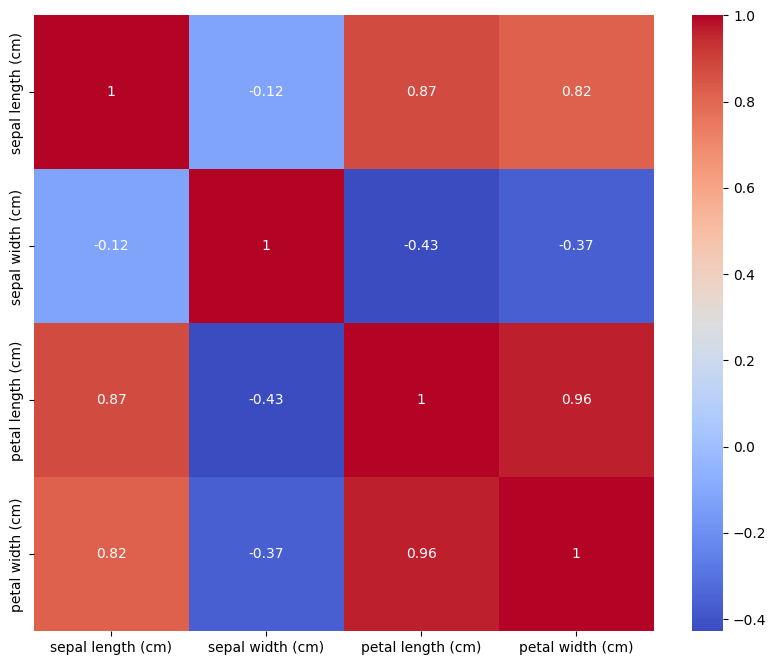

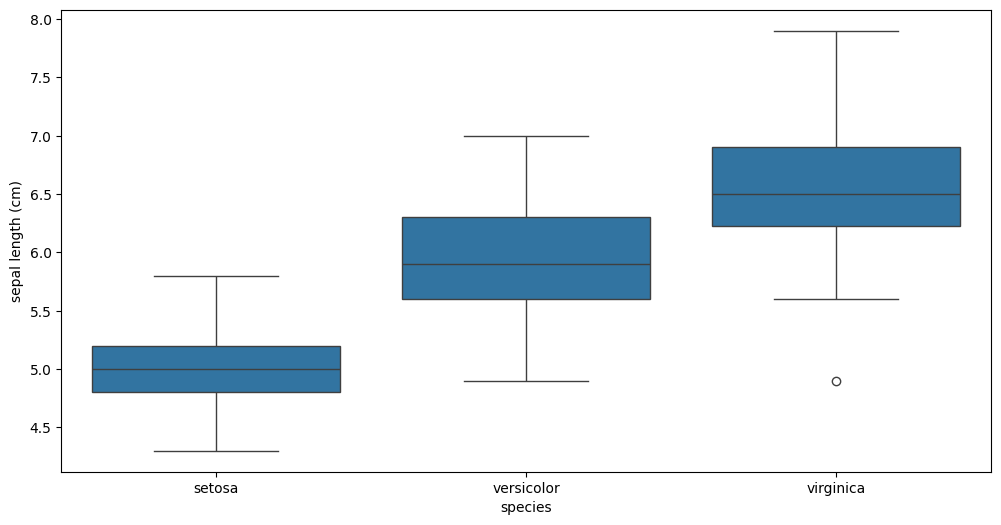

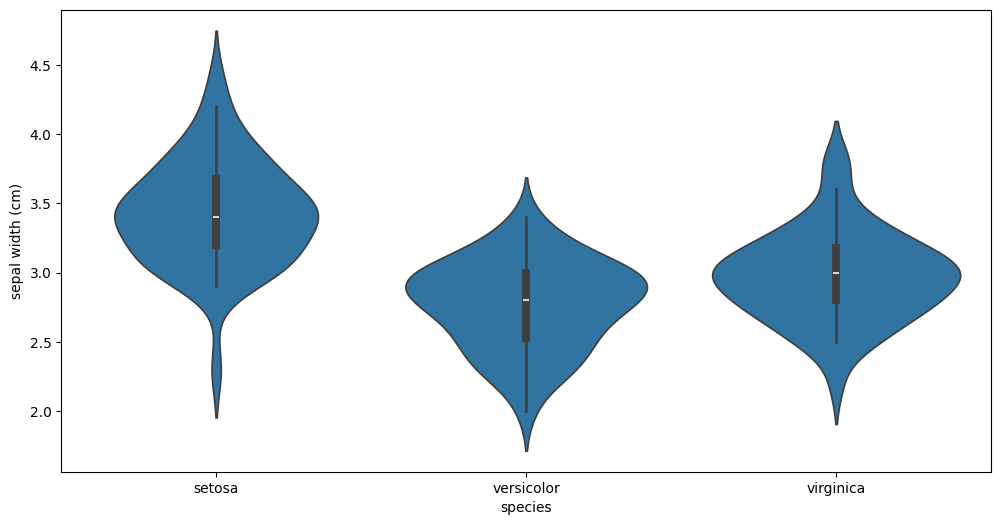

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'}) 

# Pairplot (visualisasi hubungan antar variabel)
sns.pairplot(data, hue='species')
plt.show()

# Heatmap of correlation (hanya kolom numerik)
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

# Boxplot (sepal length vs species)
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=data)
plt.show()

# Violin plot (sepal width vs species)
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='sepal width (cm)', data=data)
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

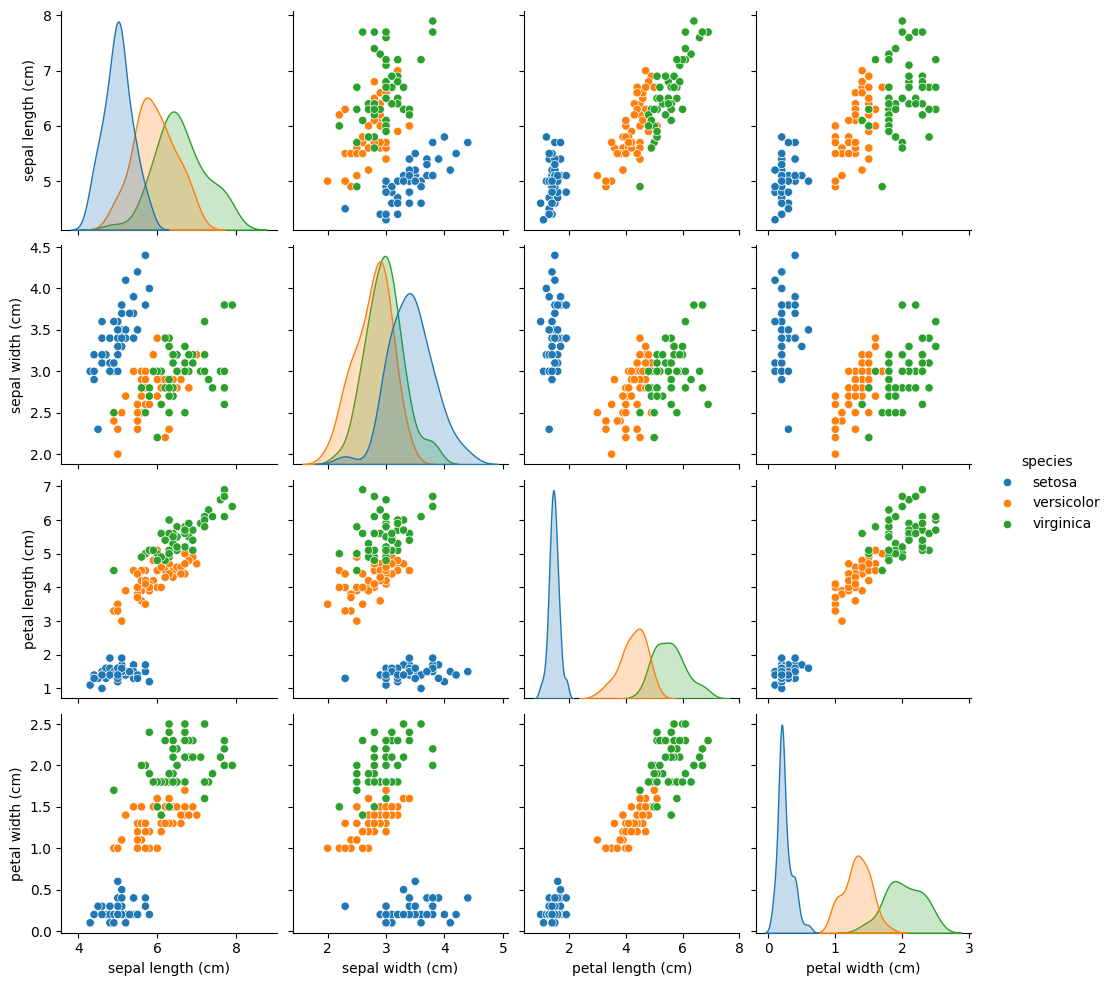

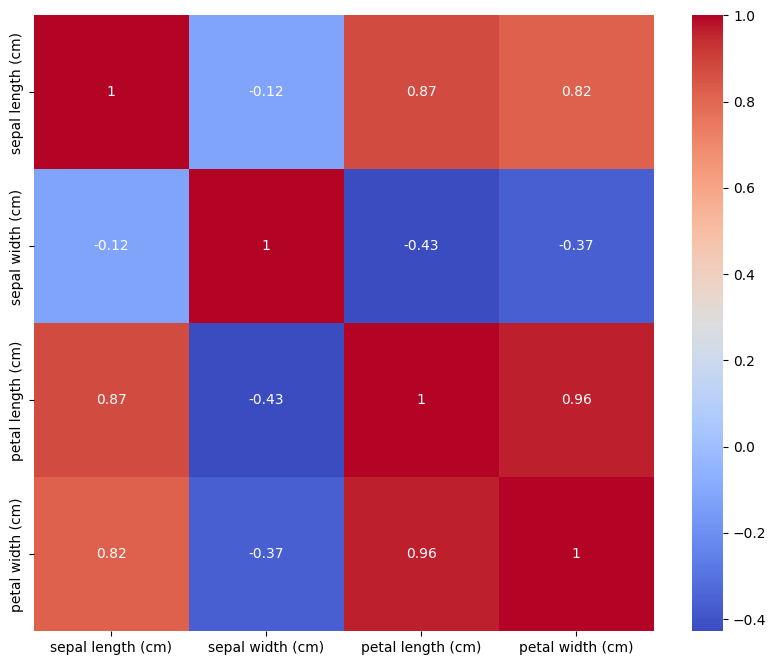

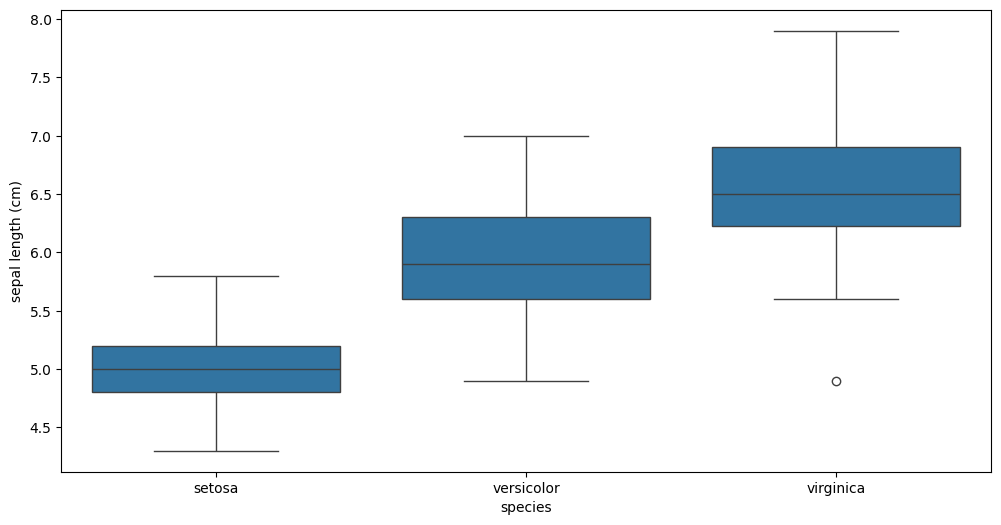

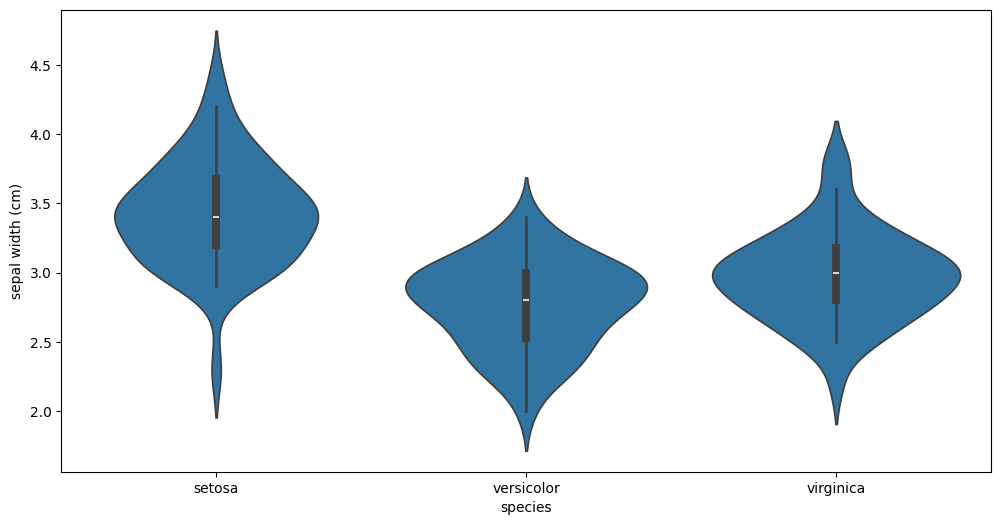

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Pairplot
sns.pairplot(data, hue='species')
plt.show()

# Heatmap of correlation (remove non-numeric 'species' column)
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

# Boxplot (sepal length vs species)
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=data)
plt.show()

# Violin plot (sepal width vs species)
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='sepal width (cm)', data=data)
plt.show()

# Split data into training and testing sets
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Split data into training and testing sets
X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)

In [9]:
import pandas as pd
# Memuat dataset
df = pd.read_csv('Book1.csv')
# Menampilkan 5 baris pertama dataset
df.head()
# Memeriksa ukuran dataset
print(f"Ukuran dataset: {df.shape}")
# Memeriksa tipe data setiap kolom
print(df.dtypes)
# Memeriksa nilai yang hilang
print(df.isnull().sum())
# Deskripsi statistik dasar
print(df.describe(include='all'))

Ukuran dataset: (5, 8)
Index              int64
Nama              object
Usia               int64
Jenis Kelamin     object
Jurusan           object
Matematika         int64
IPA                int64
Bahasa Inggris     int64
dtype: object
Index             0
Nama              0
Usia              0
Jenis Kelamin     0
Jurusan           0
Matematika        0
IPA               0
Bahasa Inggris    0
dtype: int64
           Index   Nama      Usia Jenis Kelamin      Jurusan  Matematika  \
count   5.000000      5   5.00000             5            5    5.000000   
unique       NaN      5       NaN             2            2         NaN   
top          NaN  Alice       NaN     Perempuan  Informatika         NaN   
freq         NaN      1       NaN             3            3         NaN   
mean    2.000000    NaN  20.80000           NaN          NaN   85.200000   
std     1.581139    NaN   0.83666           NaN          NaN    5.449771   
min     0.000000    NaN  20.00000           NaN          N

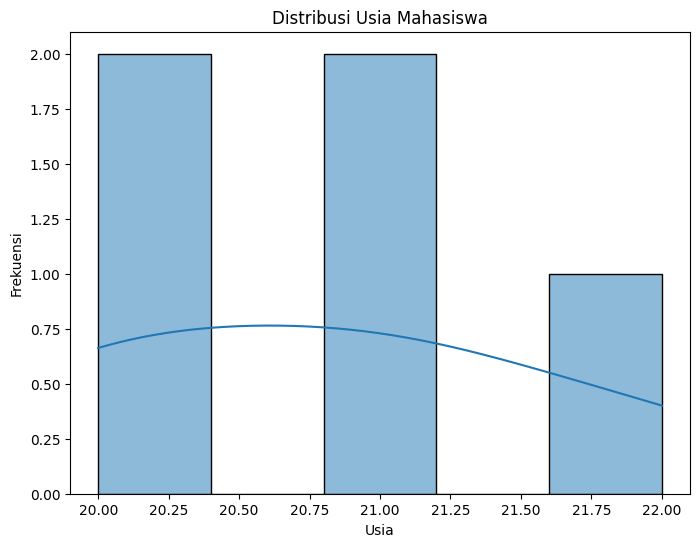

In [11]:
# Distribusi Usia: Mari kita visualisasikan distribusi usia mahasiswa.
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram untuk distribusi usia
plt.figure(figsize=(8, 6))
sns.histplot(df['Usia'], bins=5, kde=True)
plt.title('Distribusi Usia Mahasiswa')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

In [44]:
# Memastikan df memiliki kolom yang sesuai
print(df.head())
print(df.columns)

# Contoh: menyesuaikan dengan nama kolom yang benar
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Matematika ', 'IPA ', 'Bahasa_ Inggris']])
plt.title('Distribusi Nilai Mahasiswa')
plt.xlabel('Mata Pelajaran')
plt.ylabel('Nilai')
plt.show()



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


KeyError: "None of [Index(['Matematika ', 'IPA ', 'Bahasa_ Inggris'], dtype='object')] are in the [columns]"

<Figure size 1000x600 with 0 Axes>

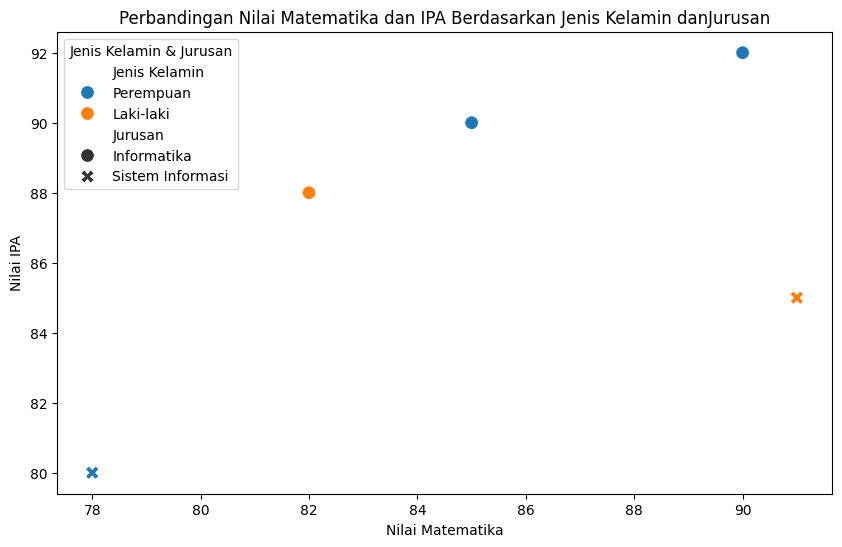

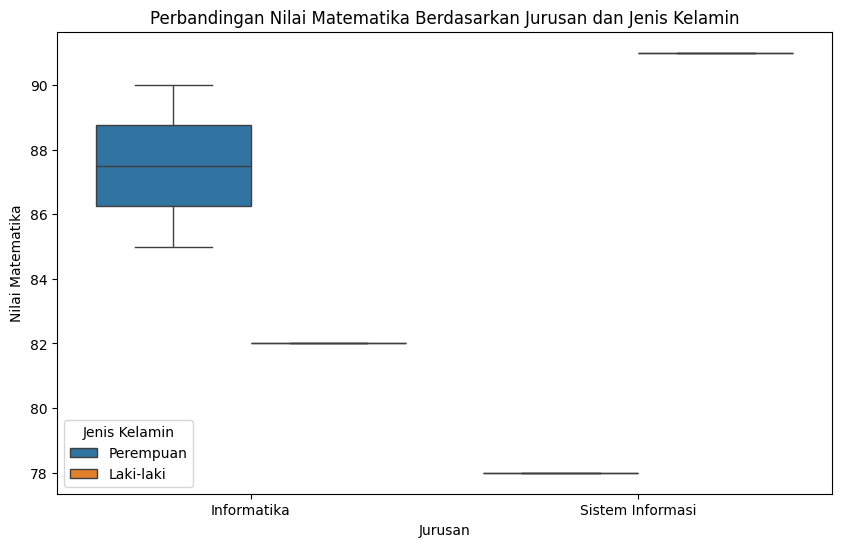

In [14]:
# Perbandingan Nilai Berdasarkan Jenis Kelamin dan Jurusan
# Visualisasikan perbandingan nilai berdasarkan jenis kelamin dan jurusan.
# Scatter plot untuk perbandingan nilai berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Matematika', y='IPA', hue='Jenis Kelamin', style='Jurusan',
data=df, s=100)
plt.title('Perbandingan Nilai Matematika dan IPA Berdasarkan Jenis Kelamin danJurusan')
plt.xlabel('Nilai Matematika')
plt.ylabel('Nilai IPA')
plt.legend(title='Jenis Kelamin & Jurusan')
plt.show()
# Boxplot untuk perbandingan nilai berdasarkan jurusan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jurusan', y='Matematika', hue='Jenis Kelamin', data=df)
plt.title('Perbandingan Nilai Matematika Berdasarkan Jurusan dan Jenis Kelamin')
plt.xlabel('Jurusan')
plt.ylabel('Nilai Matematika')
plt.show()

In [15]:
# !pip install -U scikit-learn
from sklearn.datasets import load_iris
import pandas as pd
# Memuat dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Menampilkan 5 baris pertama dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# !pip install -U scikit-learn
from sklearn.datasets import load_iris
import pandas as pd
# Memuat dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Menampilkan 5 baris pertama dataset
df.head()# Memeriksa ukuran dataset
print(df.shape)
# Memeriksa tipe data setiap kolom
print(df.dtypes)
# Memeriksa nilai yang hilang
print(df.isnull().sum())
# Deskripsi statistik dasar
print(df.describe())

(150, 5)
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std 

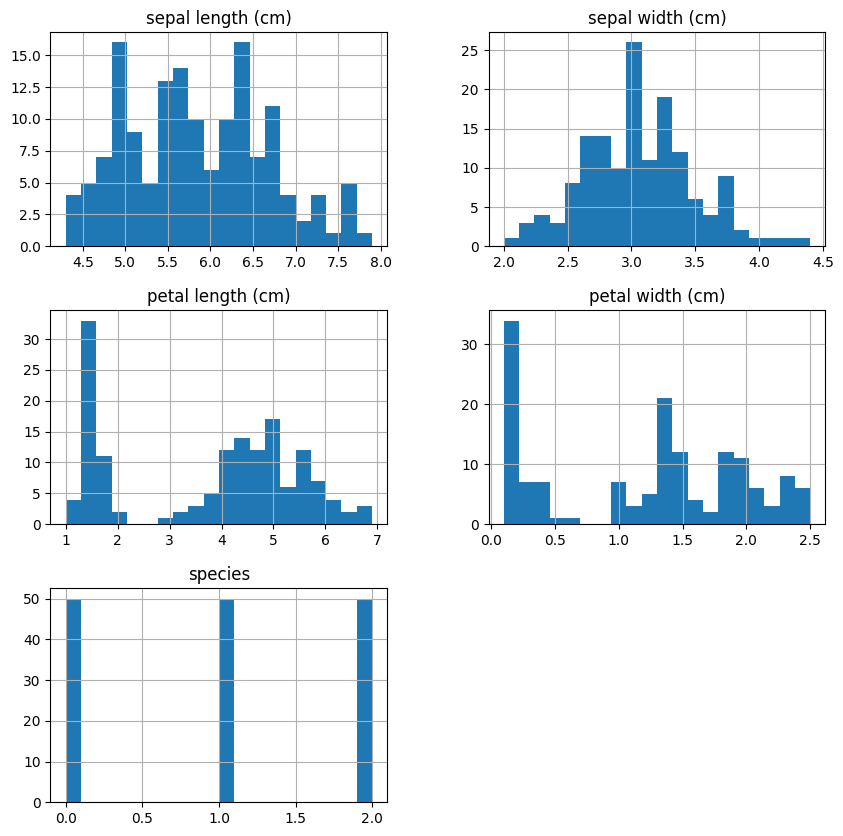

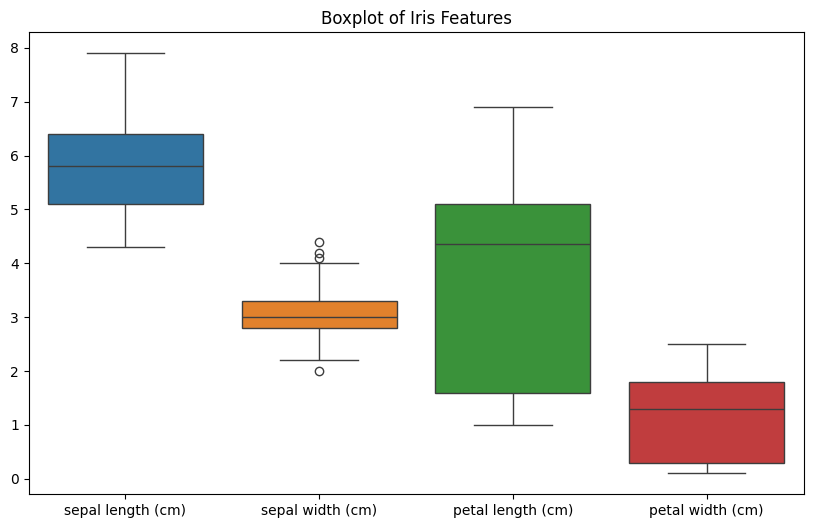

In [17]:
# Distribusi Variabel: Distribusi variabel individual dapat divisualisasikanmenggunakan histogram atau boxplot.
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram untuk setiap fitur
df.hist(bins=20, figsize=(10, 10))
plt.show()
# Boxplot untuk setiap fitur
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Boxplot of Iris Features')
plt.show()

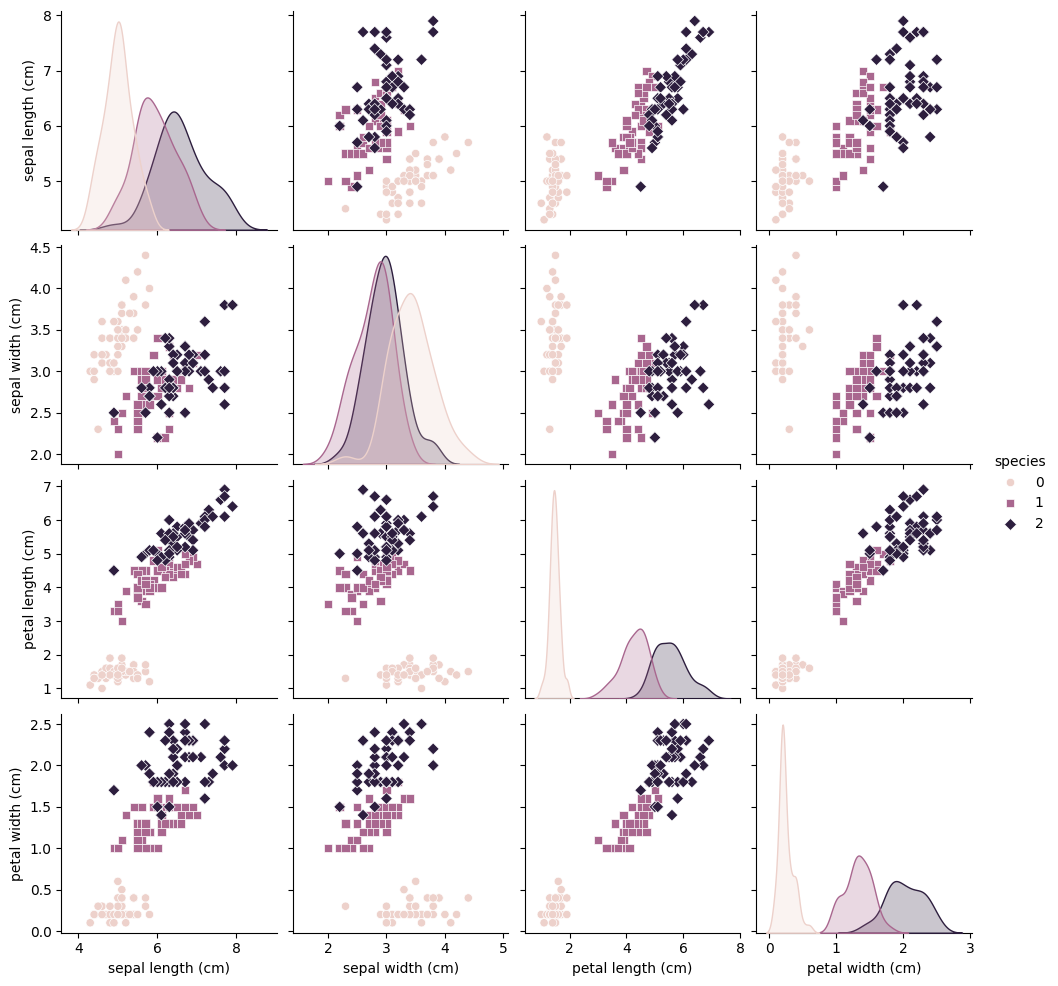

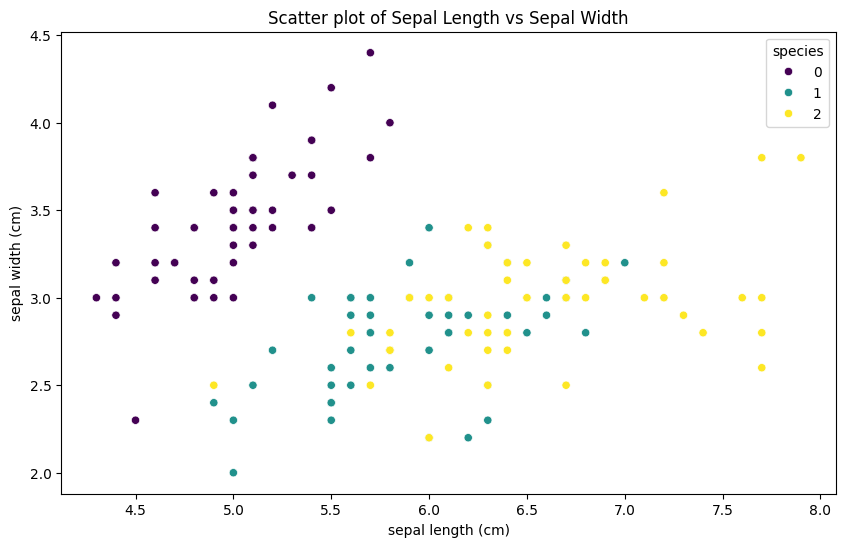

In [19]:

# Hubungan Antar Variabel: Hubungan antar variabel dapat divisualisasikanmenggunakan pairplot atau scatter plot.
# Pairplot untuk melihat hubungan antar variabel
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()
# Scatter plot untuk hubungan spesifik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species',
data=df, palette='viridis')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.show()

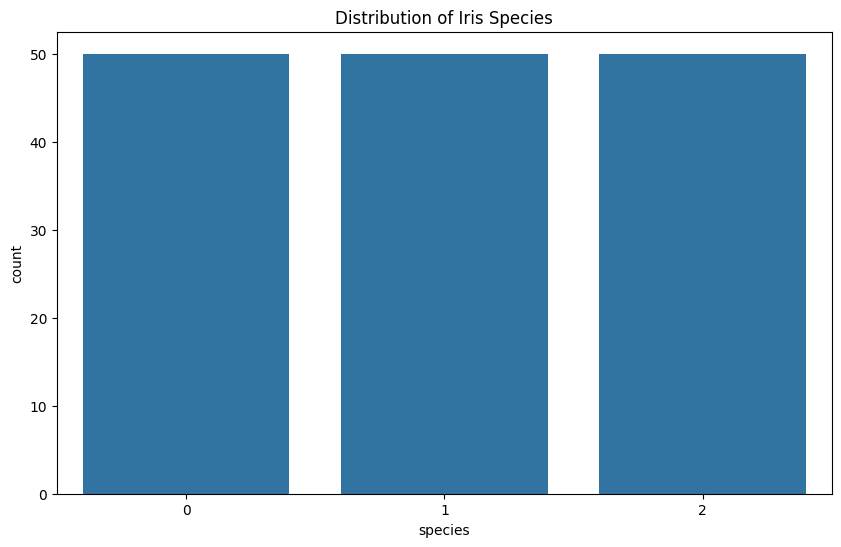

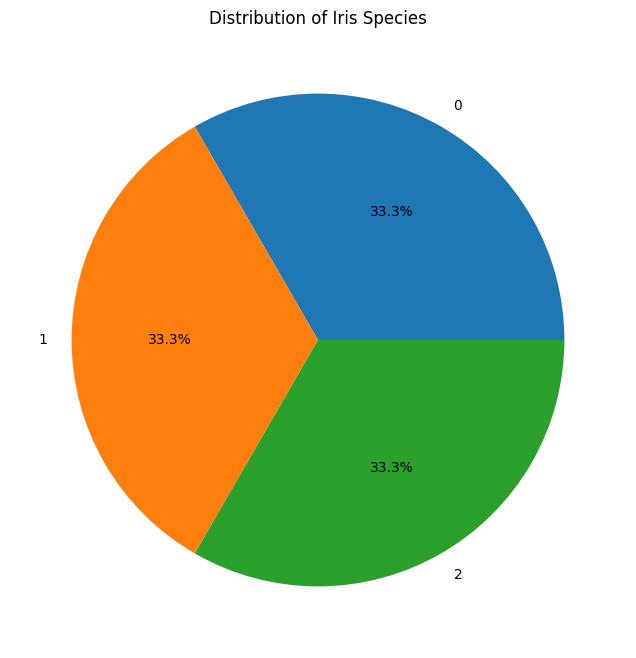

In [20]:
# Visualisasi Kelas: Distribusi kelas dalam dataset dapat divisualisasikanmenggunakan count plot atau pie chart.
# Count plot untuk distribusi kelas
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=df)
plt.title('Distribution of Iris Species')
plt.show()
# Pie chart untuk distribusi kelas
df['species'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Iris Species')
plt.ylabel('')
plt.show()

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
# Mengatur model
model = LogisticRegression(max_iter=200)

In [23]:
# Mengatur K-Fold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Melakukan cross-validation dan menghitung skor
scores = cross_val_score(model, X, y, cv=kfold)
print(f'K-Fold Cross-validation Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

K-Fold Cross-validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Score: 0.9733333333333334


In [24]:
from sklearn.model_selection import StratifiedKFold
# Mengatur Stratified K-Fold Cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Melakukan cross-validation dan menghitung skor
stratified_scores = cross_val_score(model, X, y, cv=stratified_kfold)
print(f'Stratified K-Fold Cross-validation Scores: {stratified_scores}')
print(f'Mean Score: {stratified_scores.mean()}')

Stratified K-Fold Cross-validation Scores: [1.         0.96666667 0.93333333 1.         0.93333333]
Mean Score: 0.9666666666666668


In [25]:
from sklearn.model_selection import LeaveOneOut
# Mengatur LOOCV
loocv = LeaveOneOut()
# Melakukan cross-validation dan menghitung skor
loocv_scores = cross_val_score(model, X, y, cv=loocv)
print(f'Leave-One-Out Cross-validation Mean Score: {loocv_scores.mean()}')

Leave-One-Out Cross-validation Mean Score: 0.9666666666666667
